<a href="https://colab.research.google.com/github/piousbrat/agricultural_data_analysis/blob/master/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://image.slidesharecdn.com/indianagriculture-121225033957-phpapp01/95/indian-agriculture-1-638.jpg?cb=1356407538")


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import io
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

#DATA PREPROCESSING
crops_prod_data = pd.read_csv('/content/apy.csv')
crops_prod_data['Season'] = crops_prod_data['Season'].str.rstrip()
crops_prod_data['Crop_Year']=crops_prod_data['Crop_Year'].astype(str)


#FUNCTIONS DEFINATION
def overall():
    cultivation_data = crops_prod_data[['Crop_Year', 'Crop', 'Area', 'Production']]
    y=input("Enter the name of the crop : ")
    cultivation_data=cultivation_data.groupby('Crop').get_group(y)
    cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
    
    print(cultivation_data)
    print("Bar plot of the above data")
    cultivation_data.dropna().plot(kind='bar', figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'])
    print("Line plot of the above data")
    cultivation_data.dropna().plot(figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'], linestyle='solid', marker='o', alpha=0.8, markersize=8)

def statewise():
    x=input("Enter the name of the state : ")
    y=input("Enter the name of the crop : ")
    cultivation_data = crops_prod_data[['State_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]
    
    cultivation_data=cultivation_data.groupby('State_Name').get_group(x)
    cultivation_data=cultivation_data.groupby('Crop').get_group(y)
    cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
    
    print(cultivation_data)
    print("Bar plot of the above data")
    cultivation_data.dropna().plot(kind='bar', figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'])
    print("Line plot of the above data")
    cultivation_data.dropna().plot(figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'], linestyle='solid', marker='o', alpha=0.8, markersize=8)
    
def districtwise():
    x=input("Enter the name of the state : ")
    z=input("Enter the name of the district : ")
    y=input("Enter the name of the crop : ")
    cultivation_data = crops_prod_data[['State_Name','District_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]
    
    cultivation_data=cultivation_data.groupby('State_Name').get_group(x)
    cultivation_data=cultivation_data.groupby('Crop').get_group(y)
    cultivation_data=cultivation_data.groupby('District_Name').get_group(z)
    cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
    
    print(cultivation_data)
    print("Bar plot of the above data")
    cultivation_data.dropna().plot(kind='bar', figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'])
    print("Line plot of the above data")
    cultivation_data.dropna().plot(figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'], linestyle='solid', marker='o', alpha=0.8, markersize=8)

def seasonwise():
    x=input("Enter the name of the season : ")
    z=input("Enter the name of the crop : ")
    cultivation_data=crops_prod_data[['Season', 'Crop_Year', 'Crop', 'Area', 'Production']] 
    cultivation_data=cultivation_data.groupby('Season').get_group(x)
    cultivation_data=cultivation_data.groupby('Crop').get_group(z)
    cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
    
    print(cultivation_data)
    print("Bar plot of the above data")
    cultivation_data.dropna().plot(kind='bar', figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'])
    print("Line plot of the above data")
    cultivation_data.dropna().plot(figsize=(20,10), logy=True, color=['dodgerblue', 'aqua'], linestyle='solid', marker='o', alpha=0.8, markersize=8)




def comparingstate():
    x=input("Enter the name of the state : ")
    y=input("Enter the name of the crop : ")
    cultivation_data = crops_prod_data[['State_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]
    
    cultivation_data=cultivation_data.groupby('State_Name').get_group(x)
    cultivation_data=cultivation_data.groupby('Crop').get_group(y)
    cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
    
    a=input("Enter the name of the state : ")
    b=input("Enter the name of the crop : ")
    cultivation_data1 = crops_prod_data[['State_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]
    
    cultivation_data1=cultivation_data1.groupby('State_Name').get_group(a)
    cultivation_data1=cultivation_data1.groupby('Crop').get_group(b)
    cultivation_data1=cultivation_data1.groupby('Crop_Year')[['Production', 'Area']].sum()
    
    cultivation_data.rename(columns={'Production':'Production_of_state1'}, inplace=True)
    cultivation_data.rename(columns={'Area':'Area_of_state1'}, inplace=True)
    cultivation_data1.rename(columns={'Production':'Production_of_state2'}, inplace=True)
    cultivation_data1.rename(columns={'Area':'Area_of_state2'}, inplace=True)
    df12=pd.concat([cultivation_data, cultivation_data1], axis=1)
    
    print(df12)
    ax=df12.plot(kind='bar', figsize=(20,10), color=['darkorange', 'forestgreen', 'darkgoldenrod', 'limegreen'], grid=True)
    print("COMPARISON OF PRODUCTION")
    ax=df12.plot(y=['Production_of_state1', 'Production_of_state2'], figsize=(20,10), color=['darkorange', 'darkgoldenrod'], grid=True, linestyle='solid', marker='o', alpha=0.8, markersize=8)
    print("COMPARISON OF AREA")
    ax=df12.plot(y=['Area_of_state1', 'Area_of_state2'], figsize=(20,10), color=['forestgreen', 'limegreen'], grid=True, linestyle='solid', marker='o', alpha=0.8, markersize=8)
    
def comparingdistrict():
    x=input("Enter the name of the state : ")
    z=input("Enter the name of the district : ")
    y=input("Enter the name of the crop : ")
    cultivation_data = crops_prod_data[['State_Name', 'District_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]
    
    cultivation_data=cultivation_data.groupby('State_Name').get_group(x)
    cultivation_data=cultivation_data.groupby('District_Name').get_group(z)
    cultivation_data=cultivation_data.groupby('Crop').get_group(y)
    cultivation_data=cultivation_data.groupby('Crop_Year')[['Production', 'Area']].sum()
    
    a=input("Enter the name of the state : ")
    c=input("Enter the name of the district : ")
    b=input("Enter the name of the crop : ")
    cultivation_data1 = crops_prod_data[['State_Name', 'District_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]
    
    cultivation_data1=cultivation_data1.groupby('State_Name').get_group(a)
    cultivation_data1=cultivation_data1.groupby('District_Name').get_group(c)
    cultivation_data1=cultivation_data1.groupby('Crop').get_group(b)
    cultivation_data1=cultivation_data1.groupby('Crop_Year')[['Production', 'Area']].sum()
    
    cultivation_data.rename(columns={'Production':'Production_of_district1'}, inplace=True)
    cultivation_data.rename(columns={'Area':'Area_of_district1'}, inplace=True)
    cultivation_data1.rename(columns={'Production':'Production_of_district2'}, inplace=True)
    cultivation_data1.rename(columns={'Area':'Area_of_district2'}, inplace=True)
    df12=pd.concat([cultivation_data, cultivation_data1], axis=1)
    
    print(df12)
    ax=df12.plot(kind='bar', figsize=(20,10), color=['darkorange', 'forestgreen', 'darkgoldenrod', 'limegreen'], grid=True)
    print("COMPARISON OF PRODUCTION")
    ax=df12.plot(y=['Production_of_district1', 'Production_of_district2'], figsize=(20,10), color=['darkorange', 'darkgoldenrod'], grid=True, linestyle='solid', marker='o', alpha=0.8, markersize=8)
    print("COMPARISON OF AREA")
    ax=df12.plot(y=['Area_of_district1', 'Area_of_district2'], figsize=(20,10), color=['forestgreen', 'limegreen'], grid=True, linestyle='solid', marker='o', alpha=0.8, markersize=8)
    
    
def production_of_state():
    
    x=input("enter the name of the year : ")
    y=input("enter the name of the crop : ")
    
    dd1=crops_prod_data[['State_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]

    dd1=dd1.groupby('Crop_Year').get_group('2010')
    dd1=dd1.groupby('Crop').get_group('Rice')
    dd1=dd1.groupby('State_Name')[['Production', 'Area']].sum()
    dd1=dd1.sort_values(by='Production', ascending=False)
    print(dd1)
    print("Pie chart plot of the data for top ten states")
    dd1[:10].plot(kind='pie', y='Production', figsize=(10,10), autopct='%1.1f%%')
    dd1[:10].plot(kind='pie', y='Area', figsize=(10,10), autopct='%1.1f%%')
    print('Joint plot showing the about the ratio')
    
def production_of_district():
    
    x=input("enter the name of the year : ")
    y=input("enter the name of the crop : ")
    z=input("enter the name of the state : ")
    
    dd1=crops_prod_data[['State_Name', 'District_Name', 'Crop_Year', 'Crop', 'Area', 'Production']]

    dd1=dd1.groupby('Crop_Year').get_group(x)
    dd1=dd1.groupby('Crop').get_group(y)
    dd1=dd1.groupby('State_Name').get_group(z)
    dd1=dd1.groupby('District_Name')[['Production', 'Area']].sum()
    dd1=dd1.sort_values(by='Production', ascending=False)
    print(dd1)
    print("Pie chart plot of the data for top ten states")
    dd1[:10].plot(kind='pie', y='Production', figsize=(10,10), autopct='%1.1f%%')
    dd1[:10].plot(kind='pie', y='Area', figsize=(10,10), autopct='%1.1f%%')






1. India's overall crops production
2. Year wise different crops production and area for a particular state
3. Year wise different crops production and area for a particular district
4. Season wise different crops production and area
5. Comparing a specific crop production for two different state
6. Comparing a specific crop production for two different district
7. Top ten states and their production and area for a crop in pie chart
8. Top ten district of a state and their production and area for a crop
Choose any one of the options : 8
enter the name of the year : 2000
enter the name of the crop : Banana
enter the name of the state : Karnataka
                 Production    Area
District_Name                      
DAKSHIN KANNAD      64912.0  2911.0
GULBARGA            54176.0  2725.0
SHIMOGA             52825.0  3463.0
TUMKUR              47840.0  2630.0
HASSAN              35055.0  2012.0
BELLARY             33816.0  1780.0
BANGALORE RURAL     31503.0  2320.0
MYSORE              

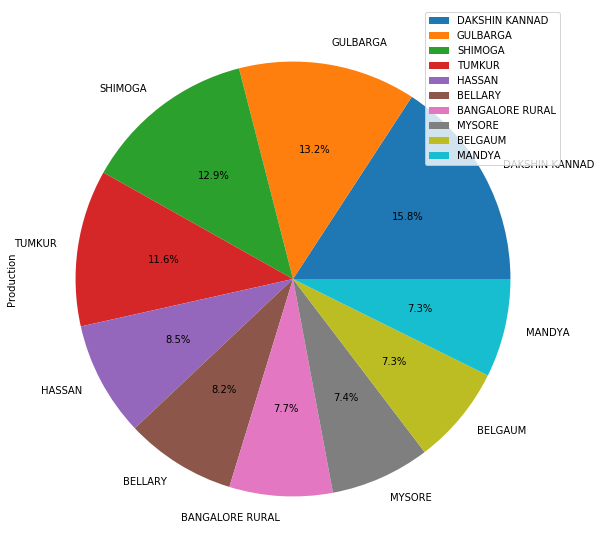

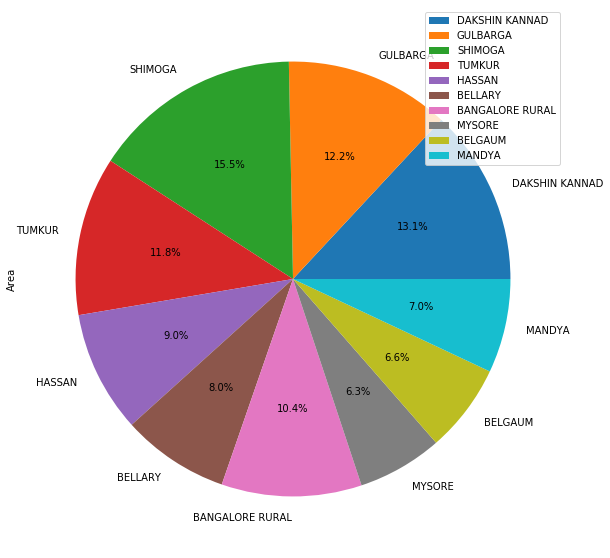

In [24]:
## print("CROPS PRODUCTION STATISTICS OF INDIA")
print("")
print("")
print("")
print("1. India's overall crops production")
print("2. Year wise different crops production and area for a particular state")
print("3. Year wise different crops production and area for a particular district")
print("4. Season wise different crops production and area")
print("5. Comparing a specific crop production for two different state")
print("6. Comparing a specific crop production for two different district")
print("7. Top ten states and their production and area for a crop in pie chart")
print("8. Top ten district of a state and their production and area for a crop")
option=input("Choose any one of the options : ")

if option=='1':
    overall()
elif option=='2':
    statewise()
elif option=='3':
    districtwise()
elif option=='4':
    seasonwise()
elif option=='5':
    comparingstate()
elif option=='6':
    comparingdistrict()
elif option=='7':
    production_of_state()
elif option=='8':
    production_of_district()
    
else:
    print("Invalid input")